In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.io import fits

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/sec7/'

In [3]:
# Now look at flare stats from iterative gaussian process fitting
df = pd.read_csv('7.gauss_flare_out.csv')
nf = len(df)
nt = len(np.unique(df['TIC']))
print(str(nf) + ' flare detections from ' + str(nt) + ' targets')

543 flare detections from 302 targets


In [4]:
df

,Unnamed: 0,Unnamed: 0.1,TIC,t0,t1,med,peak,ed,ed_err,tpeak,fwhm,amp,tpeak_err,fwhm_err,amp_err,chisq
0,0,2.0,278731274,1513.306517,1513.312072,2708.513672,2761.937988,0.000162,0.000045,1513.306824,0.001452,0.087356,0.000087,0.000770,0.036432,4.100099
1,1,6.0,122902148,1491.903587,1491.914698,1444.623230,1558.941406,0.001121,0.000634,1491.906660,0.009748,0.082916,0.000308,0.001240,0.006551,2.057361
2,2,6.0,122902148,1491.917476,1491.924421,1444.623230,1491.459229,0.001106,0.000662,1491.906640,0.010204,0.081158,0.000366,0.001547,0.007431,2.650854
3,3,6.0,122902148,1505.046777,1505.068999,1444.623230,1580.093750,0.002195,0.000863,1505.051204,0.013009,0.107963,0.000257,0.000924,0.004937,1.541062
4,4,6.0,122902148,1505.417612,1505.423167,1444.623230,1555.732178,0.000403,0.000168,1505.418080,0.002742,0.112058,0.000097,0.000481,0.013084,1.374564
5,5,6.0,122902148,1514.843925,1514.856425,1444.623230,1674.134888,0.000732,0.000131,1514.844326,0.002264,0.236470,0.000043,0.000249,0.018012,1.476947
6,6,6.0,122902148,1515.282805,1515.292527,1444.623230,1524.129639,0.000761,0.000615,1515.284854,0.009348,0.059205,0.000254,0.001030,0.004009,0.674314
7,7,38.0,272086159,1497.381431,1497.395320,626.847839,722.241638,0.001530,0.000685,1497.383453,0.005961,0.180963,0.000123,0.000473,0.009481,0.739620
8,8,38.0,272086159,1514.851177,1514.860900,626.847839,673.463135,0.001412,0.001711,1514.852901,0.014636,0.069904,0.000525,0.002185,0.006187,0.850856
9,9,77.0,322685727,1494.657586,1494.681197,15716.680664,15972.828125,0.000621,0.000258,1494.662660,0.023680,0.017181,0.000543,0.002168,0.000958,3.653722


(1, 200)

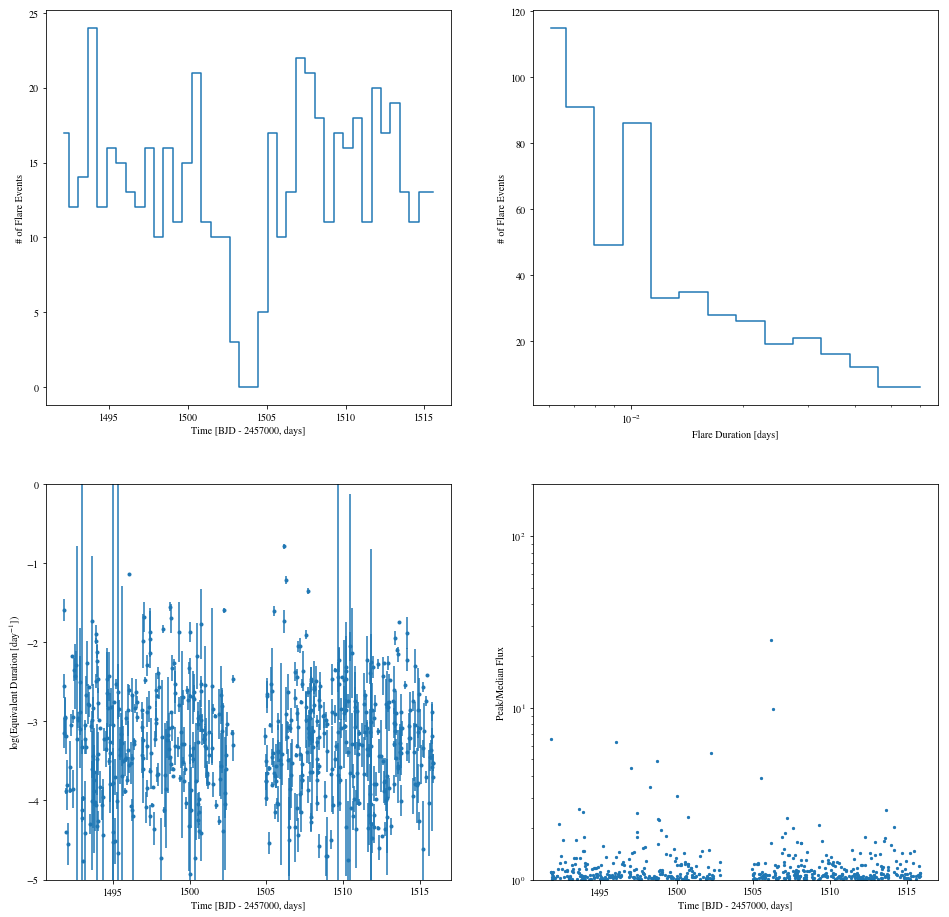

In [13]:
fig, axes = plt.subplots(figsize=(16,16), nrows=2, ncols=2)

hist, bins = np.histogram(df['t0'], bins=40)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][0].plot(bins, hist, linestyle='steps-mid')
axes[0][0].set_xlabel('Time [BJD - 2457000, days]')
axes[0][0].set_ylabel('# of Flare Events')

duration = df['t1'] - df['t0']
bins = np.logspace(np.log10(np.min(duration)), np.log10(np.max(duration)), num=15)
hist, bins = np.histogram(duration, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][1].semilogx(bins, hist, linestyle='steps-mid')
axes[0][1].set_xlabel('Flare Duration [days]')
axes[0][1].set_ylabel('# of Flare Events')

bins = 0.5*(bins[1:] + bins[:-1])
y = np.log10(df['ed'])
yerr = 0.434*df['ed_err']/df['ed']
axes[1][0].errorbar(df['t0'], y, yerr=yerr, fmt='.')
#axes[1][0].set_yscale('log')
axes[1][0].set_ylim(-5, 0)
axes[1][0].set_xlabel('Time [BJD - 2457000, days]')
axes[1][0].set_ylabel(r'log(Equivalent Duration [day$^{-1}$])')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][1].scatter(df['t0'], df['peak']/df['med'], s=5)
axes[1][1].set_yscale('log')
axes[1][1].set_xlabel('Time [BJD - 2457000, days]')
axes[1][1].set_ylabel('Peak/Median Flux')
axes[1][1].set_ylim(1, 200)

/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


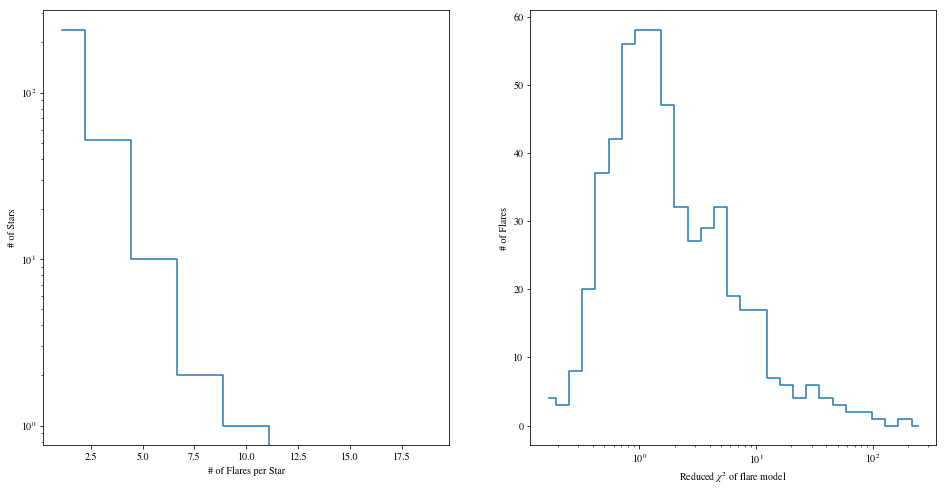

In [11]:
fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=2)

unique_tic = df['TIC'].drop_duplicates().as_matrix()
num_flares = np.zeros(len(unique_tic))
for idx, val in enumerate(unique_tic):
    num_flares[idx] = len(df[df['TIC'] == val])

bins = np.linspace(0, 20, num=10)
hist, bins = np.histogram(num_flares, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0].plot(bins, hist, linestyle='steps-mid')
axes[0].set_xlabel('# of Flares per Star')
axes[0].set_ylabel('# of Stars')
axes[0].set_yscale('log')

q = df['chisq']
bins = np.logspace(np.log10(np.min(q)), np.log10(np.max(q)), num=30)
hist, bins = np.histogram(q, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[1].plot(bins, hist, linestyle='steps-mid')
axes[1].set_xlabel(r'Reduced $\chi^{2}$ of flare model')
axes[1].set_ylabel('# of Flares')
axes[1].set_xscale('log')

tess2019006130736-s0007-0000000278731274-0131-s_lc.fits
tess2019006130736-s0007-0000000122902148-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less_equal


tess2019006130736-s0007-0000000272086159-0131-s_lc.fits
tess2019006130736-s0007-0000000322685727-0131-s_lc.fits


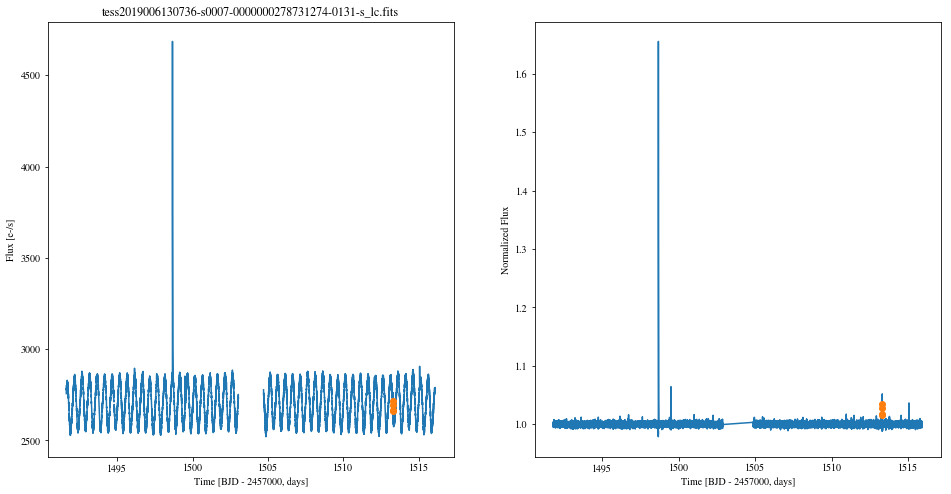

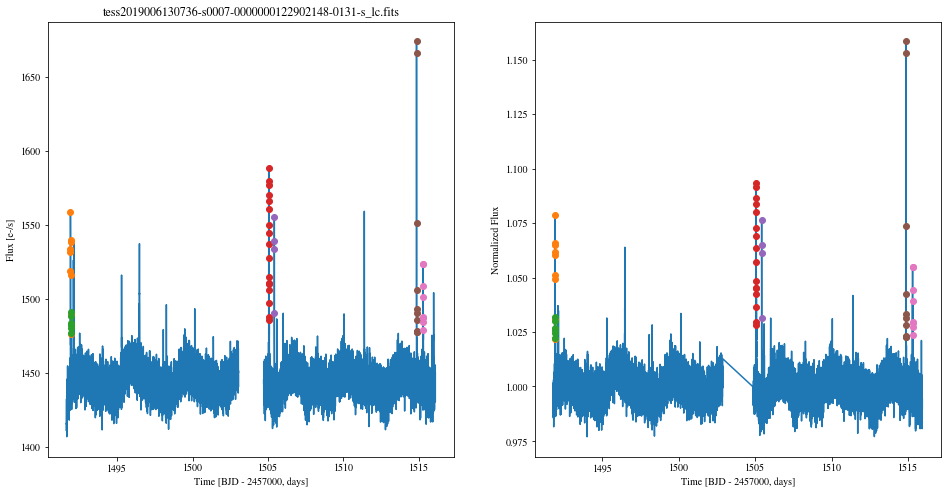

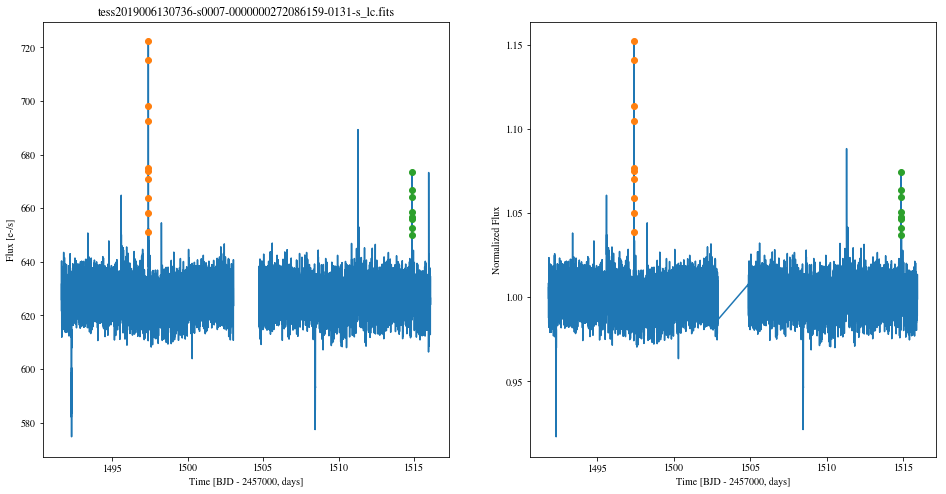

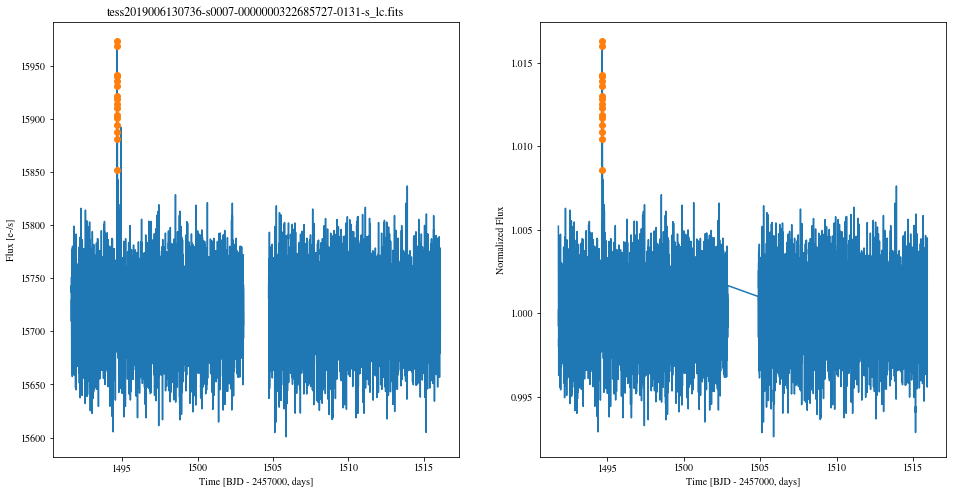

In [29]:
ind_to_plot = [0, 1, 7, 9]

# For LC 1, the jitter term in the GP kernel is dominating

for i in ind_to_plot:
    TIC = df.iloc[i]['TIC']
    TIC_str = str(int(TIC)).zfill(16)
    file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'
    print(file)

    tstart = df[df['TIC'] == TIC]['t0'].values
    tstop = df[df['TIC'] == TIC]['t1'].values

    fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=2)

    with fits.open(path+file, mode='readonly') as hdulist:
        tess_bjds = hdulist[1].data['TIME']
        pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
        pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']
        quality = hdulist[1].data['QUALITY']

    axes[0].plot(tess_bjds, pdcsap_fluxes)
    for idx in range(len((tstart))):
        indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
        axes[0].plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')
    axes[0].set_xlabel('Time [BJD - 2457000, days]')
    axes[0].set_ylabel('Flux [e-/s]')
    axes[0].set_title(file)

    smo, var = np.loadtxt(path+file+'.gp')
    time_c, flux_c, flux_err_c = np.loadtxt(path+file+'.clean')
    median, s_window, acf_1dt = np.loadtxt(path+file+'.param')

    x = time_c
    y = flux_c/median - smo + 1
    axes[1].plot(x, y)
    for idx in range(len((tstart))):
        indices = np.where((x >= tstart[idx]) & (x <= tstop[idx]))[0]
        axes[1].plot(x[indices], y[indices], 'o')
    axes[1].set_xlabel('Time [BJD - 2457000, days]')
    axes[1].set_ylabel('Normalized Flux')